# SESSION 9

TOC
1. Convolutional Neural Networks (CNNs)<br>
2. Transfer learning<br>
3. Data Augmentation<br>
4. Image preprocessing<br>
5. Loss Functions<br>
6. Optimization Algorithms<br>
7. Performance metrics<br> 
	7.1 Accuracy<br>
	7.2 Precision, Recall, and F1 Score<br>
	7.3 Confusion Matrix<br>
	7.4 ROC Curve<br>
8. API Integration with TensorFlow Serving

## 1. Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of neural networks commonly used in computer vision tasks, which use convolutional layers to learn spatial features in images and other visual data.

Here's an example of how to implement a simple CNN in Python using the Keras library:

```In this example, we define a CNN model with two convolutional layers, two max pooling layers, a flatten layer, and two dense layers. We then compile the model with an Adam optimizer and categorical cross-entropy loss function. Next, we load and preprocess the MNIST dataset, and finally we train the model on the dataset for 10 epochs using a batch size of 128. By the end of training, we should have a CNN model that can classify handwritten digits with high accuracy.```

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 0.2133 - accuracy: 0.9356 - val_loss: 0.0679 - val_accuracy: 0.9801
Epoch 2/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.0388 - val_accuracy: 0.9878
Epoch 3/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0356 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0314 - val_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0295 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0382 - val_accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0356 - val_accuracy:

<hr>

## 2. Transfer learning<br>
Transfer learning is a technique in deep learning where pre-trained models are used as a starting point for new models, instead of training a model from scratch. In transfer learning, we typically take a pre-trained model that was trained on a large dataset, and then we remove the last few layers of the model and replace them with new layers that are specific to our task. 

Here's an example of how to implement transfer learning using the Keras library:

```In this example, we load the pre-trained VGG16 model that was trained on the ImageNet dataset. We then freeze the pre-trained layers so that they will not be updated during training. Next, we add new layers specific to our task, which in this case is a binary classification task. We create the new model by specifying the input and output layers, and then we compile the model with an RMSprop optimizer and categorical cross-entropy loss function. Finally, we load and preprocess the training data using an ImageDataGenerator, and then we train the model using the fit_generator method. By the end of training, we should have a model that is able to classify new images with high accuracy, despite being trained on a much smaller dataset than the original pre-trained model.```

In [ ]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for our task
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('train', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Train the model
model.fit_generator(train_generator, steps_per_epoch=100, epochs=10)

<hr>

## 3. Data augmentation
Data augmentation is a technique used in machine learning to artificially increase the size of a dataset by creating new training examples from existing ones. This is done by applying random transformations to the existing examples, such as flipping, rotating, scaling, cropping, and adding noise. Data augmentation is especially useful in image recognition tasks, where we can generate new images by applying these transformations to existing ones.

Here's an example of how to implement data augmentation using the Keras library:

```In this example, we use the Keras ImageDataGenerator to apply various transformations to the training data, such as rotation, shifting, shearing, zooming, flipping, and filling. We specify the range of each transformation using parameters like rotation_range, width_shift_range, and horizontal_flip. We then load and preprocess the training data using the ImageDataGenerator, and use the resulting generator to train the model using the fit_generator method. By using data augmentation, we can generate many new training examples from a small dataset, which can improve the performance of the model and reduce overfitting.```

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

# Train the model with augmented data
model.fit_generator(train_generator, steps_per_epoch=100, epochs=10)

<hr>

## 4. Image preprocessing
Image preprocessing is a crucial step in any computer vision task, where we prepare the image data to be fed into a machine learning model. This involves tasks such as resizing, normalizing, and centering the images, as well as removing any unwanted noise or artifacts.

Here's an example of how to preprocess images using the OpenCV library:

```In this example, we use the OpenCV library to preprocess an image. We first load the image using the imread function, and then resize it to a fixed size using the resize function. We then convert the image to grayscale using the cvtColor function, and normalize it using the normalize function to scale the pixel values between 0 and 255. We then center the image by subtracting the mean pixel value of 127.5, and reshape it to a format that can be fed into a machine learning model. This preprocessing pipeline can be customized to suit the specific needs of the task at hand.```

In [6]:
import cv2

# Load the image
img = cv2.imread('Images/image.jpg')

# Resize the image
img = cv2.resize(img, (224, 224))

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalize the image
normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

# Center the image
centered = normalized - 127.5

# Reshape the image
reshaped = centered.reshape((1, 224, 224, 1))

<hr>

## 5. Loss Functions

In machine learning, a loss function is used to measure the difference between the predicted output of a model and the actual output. The goal of training a model is to minimize this loss function, which in turn improves the accuracy of the model. There are various types of loss functions, such as mean squared error, cross-entropy, and hinge loss, among others.

Here's an example of how to define and use a mean squared error loss function in Python:

```In this example, we define a mean squared error loss function using TensorFlow. The function takes in two arguments, y_true and y_pred, which represent the true and predicted outputs, respectively. The function then computes the mean squared error between these two inputs using the reduce_mean and square functions provided by TensorFlow.

We then use this loss function to calculate the mean squared error between two example tensors y_true and y_pred. The result of the loss function is then printed to the console, which gives us an idea of how well our model is performing.

This is just one example of a loss function, and there are many other types of loss functions that can be used depending on the specific problem being solved.```

In [7]:
import tensorflow as tf

# Define the mean squared error loss function
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Example usage of the loss function
y_true = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
y_pred = tf.constant([[1.5, 2.5, 3.5], [3.5, 4.5, 5.5], [6.5, 7.5, 8.5]], dtype=tf.float32)

mse = mse_loss(y_true, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  tf.Tensor(0.25, shape=(), dtype=float32)


<hr>

## 6. Optimization Algorithms

Optimization algorithms are used to update the weights and biases of a machine learning model during the training process. The goal of these algorithms is to minimize the loss function of the model and improve its accuracy. There are several types of optimization algorithms, such as stochastic gradient descent, Adam, and Adagrad, among others.

Here's an example of how to use the stochastic gradient descent optimization algorithm in Python:

```In this example, we define a neural network model with two dense layers using TensorFlow's Keras API. We also define a sparse categorical cross-entropy loss function, which is commonly used for multi-class classification problems.

We then define the stochastic gradient descent optimizer with a learning rate of 0.1. We load the MNIST dataset and prepare it for training by normalizing the pixel values and creating a TensorFlow dataset object.

We then train the model for five epochs using the stochastic gradient descent optimizer. For each batch of training data, we compute the loss using the defined loss function and calculate the gradients using TensorFlow's GradientTape. We then update the weights and biases of the model using the optimizer's apply_gradients method.

Finally, we print the loss value every 100 steps to monitor the progress of the training process.```

This is just one example of an optimization algorithm, and there are many other types of optimization algorithms that can be used depending on the specific problem being solved.

In [ ]:
import tensorflow as tf

# Define the model and loss function
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Define the stochastic gradient descent optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Load the MNIST dataset and prepare it for training
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(10000).batch(32)

# Train the model using stochastic gradient descent
epochs = 5
for epoch in range(epochs):
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train, logits)

    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    if step % 100 == 0:
      print("Epoch: {}, Step: {}, Loss: {}".format(epoch, step, loss_value))


<hr>

##  7. Performance metrics 

Performance metrics are used to evaluate the performance of machine learning models. They help us to understand how well our model is performing and whether it needs any improvements. In this section, we will discuss some of the common performance metrics used in machine learning and how to implement them in Python.

### 7.1 Accuracy
Accuracy is the most commonly used performance metric for classification problems. It is defined as the number of correct predictions divided by the total number of predictions. The code to calculate accuracy using scikit-learn is shown below:

In [9]:
from sklearn.metrics import accuracy_score

y_true = [0, 1, 0, 1]
y_pred = [0, 1, 1, 1]

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.75


### 7.2 Precision, Recall, and F1 Score
Precision, recall, and F1 score are commonly used performance metrics for binary classification problems. Precision is the number of true positives divided by the number of true positives plus false positives. Recall is the number of true positives divided by the number of true positives plus false negatives. F1 score is the harmonic mean of precision and recall. The code to calculate precision, recall, and F1 score using scikit-learn is shown below:

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [0, 1, 0, 1]
y_pred = [0, 1, 1, 1]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Precision:  0.6666666666666666
Recall:  1.0
F1 score:  0.8


### 7.3 Confusion Matrix
A confusion matrix is a table that summarizes the performance of a machine learning model for each class. The table compares the actual class with the predicted class. The code to calculate the confusion matrix using scikit-learn is shown below:

In [11]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 1]
y_pred = [0, 1, 1, 1]

conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion matrix: ")
print(conf_matrix)

Confusion matrix: 
[[1 1]
 [0 2]]


### 7.4 ROC Curve
The Receiver Operating Characteristic (ROC) curve is a plot that shows the trade-off between the true positive rate and false positive rate for different thresholds of the predicted probabilities. The code to plot the ROC curve using scikit-learn is shown below:

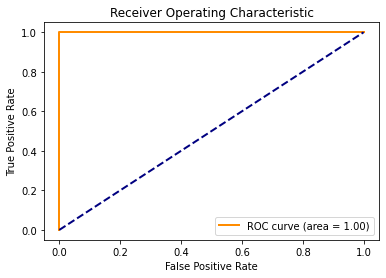

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = [0, 1, 0, 1]
y_pred_prob = [0.2, 0.8, 0.4, 0.6]

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<hr>

## 8. API Integration with TensorFlow Serving

To integrate a TensorFlow model with an API using TensorFlow Serving, we need to follow a few steps:

Export the TensorFlow model in the SavedModel format
Install and start the TensorFlow Serving server
Send prediction requests to the server using a RESTful API
Here is the Python code to perform these steps:

```In this code, we first load a pre-trained ResNet50 model and save it in the SavedModel format using the tf.saved_model.save function. Next, we start the TensorFlow Serving server using Docker and bind the saved model to the server. Finally, we load an example image, preprocess it, and send a prediction request to the server using the RESTful API. The server returns a JSON object containing the predicted probabilities for each class, which we can then use for further processing.```

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array
import requests
import json

# Step 1: Export the TensorFlow model in the SavedModel format
model = ResNet50(weights='imagenet')
tf.saved_model.save(model, 'resnet_saved_model')

# Step 2: Install and start the TensorFlow Serving server
# You can install the TensorFlow Serving server using Docker or by building from source.
# Here is an example command to start the server:
# docker run -p 8501:8501 --mount type=bind,source=/path/to/resnet_saved_model,target=/models/resnet -e MODEL_NAME=resnet -t tensorflow/serving

# Step 3: Send prediction requests to the server using a RESTful API
image_path = 'Images/image.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [224, 224])
image = tf.cast(image, tf.float32) / 255.0
image = tf.expand_dims(image, 0)
data = json.dumps({"signature_name": "serving_default", "instances": image.numpy().tolist()})
headers = {"content-type": "application/json"}
response = requests.post('http://localhost:8501/v1/models/resnet:predict', data=data, headers=headers)
prediction = json.loads(response.text)['predictions'][0]

print(prediction)

<hr>